In [20]:
from copy import copy

In [21]:
txt = """
(footprint "PlanarTransformer_ELP-102-20-38_4T:1T"
	(version 20241229)
	(generator "pcbnew")
	(generator_version "9.0")
	(layer "F.Cu")
    
"""

txt_rec="""
	(fp_rect
		(start xs_ ys_)
		(end   xe_ ye_)
		(stroke (width linewidth_) (type solid))
		(fill no)
		(layer "layerval_")
	)
"""

txt_arc="""
	(fp_arc
		(start xs_ ys_)
		(mid xm_ ym_)
		(end xe_ ye_)
		(stroke
			(width linewidth_)
			(type solid)
		)
		(layer "layerval_")
	)
"""

txt_line = """
	(fp_line
		(start xs_ ys_)
		(end xe_ ye_)
		(stroke
			(width linewidth_)
			(type default)
		)
		(layer layerval_)
	)
"""


    
def make_rec(xs,ys,xe,ye,linewidth,layer):
    txtin = copy(txt_rec)
    txtin = txtin.replace("xs_",str(xs))
    txtin = txtin.replace("ys_",str(ys))
    txtin = txtin.replace("xe_",str(xe))
    txtin = txtin.replace("ye_",str(ye))
    txtin = txtin.replace("linewidth_",str(linewidth))
    txtin = txtin.replace("layerval_",str(layer))
    return txtin

def make_arc(xs,ys,xm,ym,xe,ye,linewidth,layer):
    txtin = copy(txt_arc)
    txtin = txtin.replace("xs_",str(xs))
    txtin = txtin.replace("ys_",str(ys))
    txtin = txtin.replace("xe_",str(xe))
    txtin = txtin.replace("ye_",str(ye))
    txtin = txtin.replace("xm_",str(xm))
    txtin = txtin.replace("ym_",str(ym))
    txtin = txtin.replace("linewidth_",str(linewidth))
    txtin = txtin.replace("layerval_",str(layer))
    return txtin


def make_line(xs,ys,xe,ye,linewidth,layer):
    txtin = copy(txt_line)
    txtin = txtin.replace("xs_",str(xs))
    txtin = txtin.replace("ys_",str(ys))
    txtin = txtin.replace("xe_",str(xe))
    txtin = txtin.replace("ye_",str(ye))
    txtin = txtin.replace("linewidth_",str(linewidth))
    txtin = txtin.replace("layerval_",str(layer))
    return txtin
    
    
print(make_rec(0,0,10,20,linewidth=0.2,layer = "F.Fab"))
print(make_arc(0,1,0.7,0.7,0,1,linewidth=0.23,layer = "F.Cu"))
print(make_line(0,0,10,10,linewidth=0.2,layer = "F.Fab"))



	(fp_rect
		(start 0 0)
		(end   10 20)
		(stroke (width 0.2) (type solid))
		(fill no)
		(layer "F.Fab")
	)


	(fp_arc
		(start 0 1)
		(mid 0.7 0.7)
		(end 0 1)
		(stroke
			(width 0.23)
			(type solid)
		)
		(layer "F.Cu")
	)


	(fp_line
		(start 0 0)
		(end 10 10)
		(stroke
			(width 0.2)
			(type default)
		)
		(layer F.Fab)
	)



In [22]:
#print(make_pad2(Num=1, point=(0,20),layers=["F.Cu", "B.Cu"],rotation= 0))

In [23]:
import handcalcs.render

In [24]:

%%render 
A = 102
B =86
C=37.5
E=14
xa=(A-B)/2
xb=A/2-E/2
xc=A/2+E/2
xd= A-xa
xab= abs(xa-xb)
xdc=xab
xcb=E

<IPython.core.display.Latex object>

In [25]:
%%render 
margin = 3
eCu=0.5
N=4
dx = (xb-margin)-(xa+margin)
lineW= (dx-(N-1)*eCu)/N
x=xa+margin+lineW/2

<IPython.core.display.Latex object>

In [26]:
x=xa+margin+lineW/2
pas=lineW+eCu
for i in range(N):
    print(i,x) 
    x=x+pas
x,xb-margin-lineW/2

0 14.5625
1 22.1875
2 29.8125
3 37.4375


(45.0625, 37.4375)

In [27]:
finaltxt = copy(txt )
finaltxt += make_rec(0,0,102,37.5,linewidth=0.2,layer = "F.Fab")
finaltxt += make_line(xa,0,xa,37.5,linewidth=0.2,layer = "F.Fab")
finaltxt += make_line(xb,0,xb,37.5,linewidth=0.2,layer = "F.Fab")
finaltxt += make_line(xc,0,xc,37.5,linewidth=0.2,layer = "F.Fab")
finaltxt += make_line(xd,0,xd,37.5,linewidth=0.2,layer = "F.Fab")
#finaltxt += make_arc(0,1,0.7,0.7,1,0,linewidth=0.23,layer = "F.Cu")
x1=xa+margin+lineW/2
x2=xd-margin-lineW/2
y1= -(margin+lineW/2)-(N-1)*pas
y2= C+ (margin+lineW/2)+(N-1)*pas

for i in range(N):
    #print(i,x) 
    finaltxt += make_line(x1,y1,x1,y2,linewidth=lineW,layer = "F.Cu")
    finaltxt += make_line(x2,y1,x2,y2,linewidth=lineW,layer = "F.Cu")
    finaltxt += make_line(x1,y1,x2,y1,linewidth=lineW,layer = "F.Cu")
    finaltxt += make_line(x1,y2,x2,y2,linewidth=lineW,layer = "F.Cu")
    x1=x1+pas
    x2=x2-pas
    y1= y1+pas
    y2= y2-pas
    print(x1,y1, x2,y2)

finaltxt +="\n)"
#print(finaltxt)
with open("Testfoot123.kicad_mod", "w") as f: 
    f.write(finaltxt )

22.1875 -21.8125 79.8125 59.3125
29.8125 -14.1875 72.1875 51.6875
37.4375 -6.5625 64.5625 44.0625
45.0625 1.0625 56.9375 36.4375


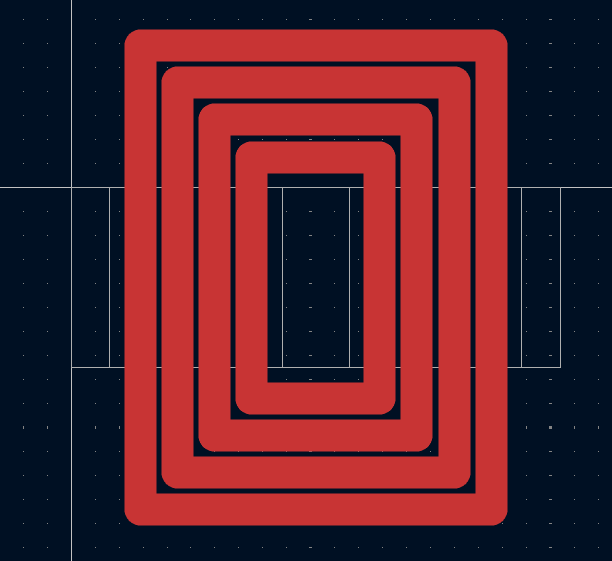

In [28]:
def make_rec2(pointS,pointE,linewidth,layer):
    xs,ys = pointS
    xe,ye = pointE
    return make_rec(xs,ys,xe,ye,linewidth,layer)

def make_arc2(pointS,pointM,pointE,linewidth,layer):
    xs,ys = pointS
    xe,ye = pointE
    xm,ym = pointM
    return make_arc(xs,ys,xm,ym,xe,ye,linewidth,layer)


def make_line2(pointS,pointE,linewidth,layer):
    xs,ys = pointS
    xe,ye = pointE
    return make_line(xs,ys,xe,ye,linewidth,layer)

In [29]:
finaltxt = copy(txt )
finaltxt += make_rec(0,0,102,37.5,linewidth=0.2,layer = "F.Fab")
finaltxt += make_line(xa,0,xa,37.5,linewidth=0.2,layer = "F.Fab")
finaltxt += make_line(xb,0,xb,37.5,linewidth=0.2,layer = "F.Fab")
finaltxt += make_line(xc,0,xc,37.5,linewidth=0.2,layer = "F.Fab")
finaltxt += make_line(xd,0,xd,37.5,linewidth=0.2,layer = "F.Fab")
#finaltxt += make_arc(0,1,0.7,0.7,1,0,linewidth=0.23,layer = "F.Cu")
x1=xa+margin+lineW/2
x2=xd-margin-lineW/2
y1= -(margin+lineW/2)-(N-1)*pas
y2= C+ (margin+lineW/2)+(N-1)*pas

for i in range(N):
    #print(i,x) 
    point1 = (x1,y1)
    point2 = (x1,y2)
    point3 = (x2,y2)
    point4 = (x2,y1)
    finaltxt += make_line2(point1,point2,linewidth=lineW,layer = "F.Cu")
    finaltxt += make_line2(point2,point3,linewidth=lineW,layer = "F.Cu")
    finaltxt += make_line2(point3,point4,linewidth=lineW,layer = "F.Cu")
    finaltxt += make_line2(point4,point1,linewidth=lineW,layer = "F.Cu")
    x1=x1+pas
    x2=x2-pas
    y1= y1+pas
    y2= y2-pas
    print(x1,y1, x2,y2)

finaltxt +="\n)"
#print(finaltxt)
with open("Testfoot123.kicad_mod", "w") as f: 
    f.write(finaltxt )

22.1875 -21.8125 79.8125 59.3125
29.8125 -14.1875 72.1875 51.6875
37.4375 -6.5625 64.5625 44.0625
45.0625 1.0625 56.9375 36.4375


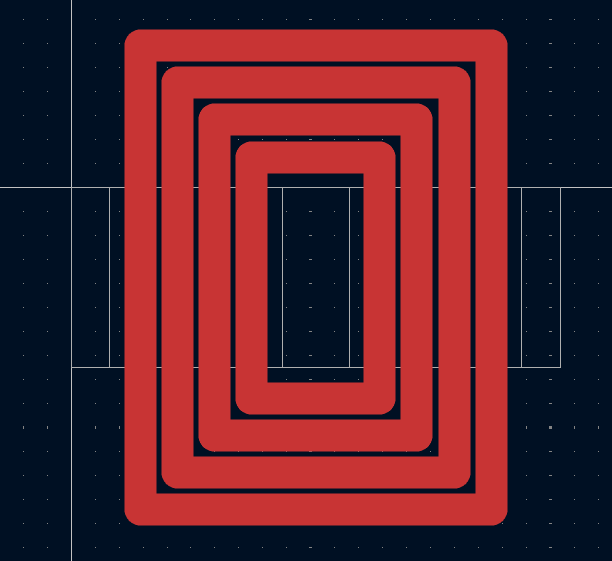

In [30]:
finaltxt = copy(txt )
finaltxt += make_rec(0,0,102,37.5,linewidth=0.2,layer = "F.Fab")
finaltxt += make_line(xa,0,xa,37.5,linewidth=0.2,layer = "F.Fab")
finaltxt += make_line(xb,0,xb,37.5,linewidth=0.2,layer = "F.Fab")
finaltxt += make_line(xc,0,xc,37.5,linewidth=0.2,layer = "F.Fab")
finaltxt += make_line(xd,0,xd,37.5,linewidth=0.2,layer = "F.Fab")
#finaltxt += make_arc(0,1,0.7,0.7,1,0,linewidth=0.23,layer = "F.Cu")
x1=xa+margin+lineW/2
x10=xb #x1+pas*(N-1)
x2=xd-margin-lineW/2
x20= xc# x2-pas*(N-1)
y1= -(margin+lineW/2)-(N-1)*pas
y2= C+ (margin+lineW/2)+(N-1)*pas

for i in range(N):
    #print(i,x) 
    point1 = (x1,0)
    point2 = (x1,C)
    
    point22 = (x10,y2) 
    point33 = (x20,y2)

    point4 = (x2,C)
    point5 = (x2,0)

    point66 = (x10,y1) 
    point77 = (x20,y1)



    # turn in the direction of positive radian

    finaltxt += make_line2(point1,point2,linewidth=lineW,layer = "F.Cu")
    #finaltxt += make_line2(point2,point22,linewidth=lineW,layer = "F.Cu")
    finaltxt += make_line2(point22,point33,linewidth=lineW,layer = "F.Cu")
    #finaltxt += make_line2(point33,point4,linewidth=lineW,layer = "F.Cu")
    finaltxt += make_line2(point4,point5,linewidth=lineW,layer = "F.Cu")
    #finaltxt += make_line2(point5,point66,linewidth=lineW,layer = "F.Cu")
    finaltxt += make_line2(point66,point77,linewidth=lineW,layer = "F.Cu")
    x1=x1+pas
    x2=x2-pas
    y1= y1+pas
    y2= y2-pas
    print(x1,y1, x2,y2)

finaltxt +="\n)"
#print(finaltxt)
with open("Testfoot123_V2.kicad_mod", "w") as f: 
    f.write(finaltxt )

22.1875 -21.8125 79.8125 59.3125
29.8125 -14.1875 72.1875 51.6875
37.4375 -6.5625 64.5625 44.0625
45.0625 1.0625 56.9375 36.4375


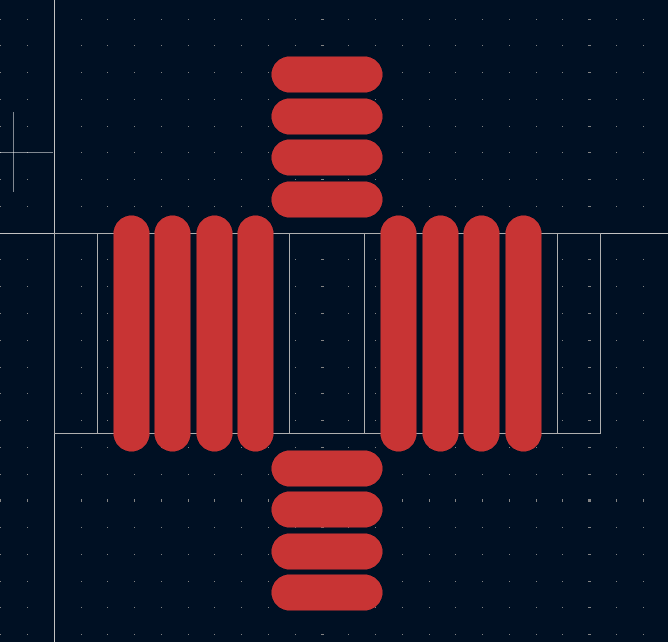

In [31]:
from math import sqrt
from math import sqrt

from math import sqrt, hypot

def arc_mid_90(p1, p2, turn='p'):
    """
    Returns the mid-point of a 90° circular arc between p1 and p2.
    turn = 'p'  -> +90° (positive)
    turn = 'n'  -> -90° (negative)
    """
    x1, y1 = p1
    x2, y2 = p2

    dx, dy = x2 - x1, y2 - y1
    d = hypot(dx, dy)
    if d == 0:
        raise ValueError("p1 and p2 must be different points.")

    # Midpoint of the chord
    mx, my = (x1 + x2) / 2.0, (y1 + y2) / 2.0

    # Unit normal: choose so that 'p' gives +90° as you expect
    nx, ny = (dy / d, -dx / d)   # this makes (1,0)->(0,1), 'p' -> (1/√2,1/√2)
    if turn == 'n':
        nx, ny = -nx, -ny

    # Sagitta for a 90° arc: s = d/√2 - d/2
    s = d / sqrt(2.0) - d / 2.0

    return (mx + nx * s, my + ny * s)

# Example:
point1 = (1, 0)
point2 = (0, 1)
print(arc_mid_90(point1, point2,turn='n'))  # -> (0.707106..., 0.707106...)
print(arc_mid_90(point1, point2,turn='p'))  # -> (0.707106..., 0.707106...)

(0.29289321881345254, 0.29289321881345254)
(0.7071067811865475, 0.7071067811865475)


In [32]:
finaltxt = copy(txt )
finaltxt += make_rec(0,0,102,37.5,linewidth=0.2,layer = "F.Fab")
finaltxt += make_line(xa,0,xa,37.5,linewidth=0.2,layer = "F.Fab")
finaltxt += make_line(xb,0,xb,37.5,linewidth=0.2,layer = "F.Fab")
finaltxt += make_line(xc,0,xc,37.5,linewidth=0.2,layer = "F.Fab")
finaltxt += make_line(xd,0,xd,37.5,linewidth=0.2,layer = "F.Fab")
#finaltxt += make_arc(0,1,0.7,0.7,1,0,linewidth=0.23,layer = "F.Cu")
x1=xa+margin+lineW/2
x10=xb #x1+pas*(N-1)
x2=xd-margin-lineW/2
x20= xc# x2-pas*(N-1)
y1= -(margin+lineW/2)-(N-1)*pas
y2= C+ (margin+lineW/2)+(N-1)*pas

for i in range(N):
    #print(i,x) 
    point1 = (x1,0)
    point2 = (x1,C)
    
    point22 = (x10,y2) 
    point33 = (x20,y2)

    point4 = (x2,C)
    point5 = (x2,0)

    point77 = (x10,y1) 
    point66 = (x20,y1)



    p1, p2 = point2 , point22
    pm = arc_mid_90(p1, p2,turn='n')
    finaltxt += make_arc2(p1,pm,p2, linewidth=lineW,layer = "F.Cu")

    p1, p2 = point33, point4
    pm = arc_mid_90(p1, p2,turn='n')
    finaltxt += make_arc2(p1,pm,p2, linewidth=lineW,layer = "F.Cu")


    p1, p2 = point5, point66
    pm = arc_mid_90(p1, p2,turn='n')
    finaltxt += make_arc2(p1,pm,p2, linewidth=lineW,layer = "F.Cu")


    p1, p2 = point77, point1
    pm = arc_mid_90(p1, p2,turn='n')
    finaltxt += make_arc2(p1,pm,p2, linewidth=lineW,layer = "F.Cu")



    # turn in the direction of positive radian

    finaltxt += make_line2(point1,point2,linewidth=lineW,layer = "F.Cu")
    #finaltxt += make_line2(point2,point22,linewidth=lineW,layer = "F.Cu")
    finaltxt += make_line2(point22,point33,linewidth=lineW,layer = "F.Cu")
    #finaltxt += make_line2(point33,point4,linewidth=lineW,layer = "F.Cu")
    finaltxt += make_line2(point4,point5,linewidth=lineW,layer = "F.Cu")
    #finaltxt += make_line2(point5,point66,linewidth=lineW,layer = "F.Cu")
    finaltxt += make_line2(point66,point77,linewidth=lineW,layer = "F.Cu")
    x1=x1+pas
    x2=x2-pas
    y1= y1+pas
    y2= y2-pas
    print(x1,y1, x2,y2)

finaltxt +="\n)"
#print(finaltxt)
with open("Testfoot123_V2.kicad_mod", "w") as f: 
    f.write(finaltxt )

22.1875 -21.8125 79.8125 59.3125
29.8125 -14.1875 72.1875 51.6875
37.4375 -6.5625 64.5625 44.0625
45.0625 1.0625 56.9375 36.4375


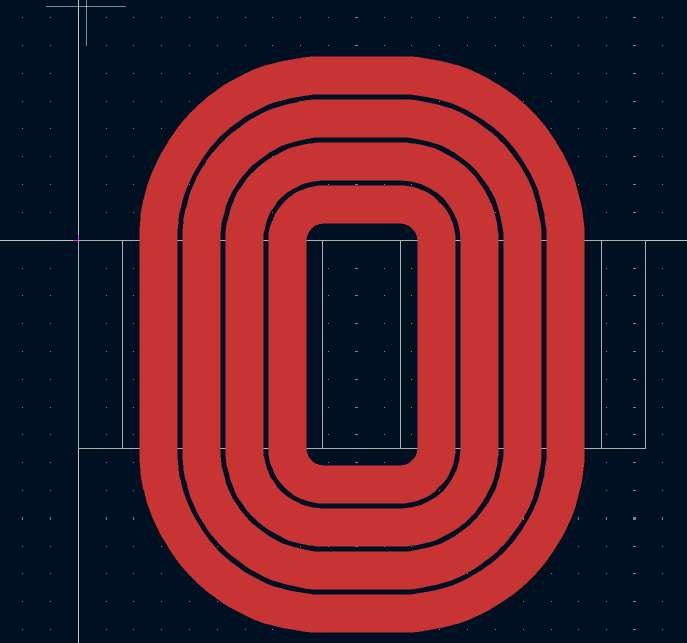

In [33]:
finaltxt = copy(txt )


# make core foot
finaltxt += make_rec(0,0,102,37.5,linewidth=0.2,layer = "F.Fab")
finaltxt += make_line(xa,0,xa,37.5,linewidth=0.2,layer = "F.Fab")
finaltxt += make_line(xb,0,xb,37.5,linewidth=0.2,layer = "F.Fab")
finaltxt += make_line(xc,0,xc,37.5,linewidth=0.2,layer = "F.Fab")
finaltxt += make_line(xd,0,xd,37.5,linewidth=0.2,layer = "F.Fab")




x1=xa+margin+lineW/2
x10=xb #x1+pas*(N-1)
x2=xd-margin-lineW/2
x20= xc# x2-pas*(N-1)
y1= -(margin+lineW/2)-(N-1)*pas
y2= C+ (margin+lineW/2)+(N-1)*pas


arr1 = []
arr2=[]
for i in range(N):
    #print(i,x) 
    point1 = (x1,0)
    point2 = (x1,C)
    
    point22 = (x10,y2) 
    point33 = (x20,y2)

    point4 = (x2,C)
    point5 = (x2,0)

    point77 = (x10+pas,y1) 
    #if i ==N-1:
    #    point77= (x10+pas,y1)
    point66 = (x20,y1)



    p1, p2 = point2 , point22
    pm = arc_mid_90(p1, p2,turn='n')
    finaltxt += make_arc2(p1,pm,p2, linewidth=lineW,layer = "F.Cu")

    p1, p2 = point33, point4
    pm = arc_mid_90(p1, p2,turn='n')
    finaltxt += make_arc2(p1,pm,p2, linewidth=lineW,layer = "F.Cu")


    p1, p2 = point5, point66
    pm = arc_mid_90(p1, p2,turn='n')
    finaltxt += make_arc2(p1,pm,p2, linewidth=lineW,layer = "F.Cu")


    p1, p2 = point77, point1
    arr1.append(p1)
    arr2.append(p2)




    # turn in the direction of positive radian

    finaltxt += make_line2(point1,point2,linewidth=lineW,layer = "F.Cu")
    #finaltxt += make_line2(point2,point22,linewidth=lineW,layer = "F.Cu")
    finaltxt += make_line2(point22,point33,linewidth=lineW,layer = "F.Cu")
    #finaltxt += make_line2(point33,point4,linewidth=lineW,layer = "F.Cu")
    finaltxt += make_line2(point4,point5,linewidth=lineW,layer = "F.Cu")
    #finaltxt += make_line2(point5,point66,linewidth=lineW,layer = "F.Cu")
    if i<N-1:
        #point77= (x10+pas,y1)
        finaltxt += make_line2(point66,point77,linewidth=lineW,layer = "F.Cu")
    x1=x1+pas
    x2=x2-pas
    y1= y1+pas
    y2= y2-pas
    print(x1,y1, x2,y2)


for i in range(len(arr1)-1):
    p1=  arr1[i]   
    p2=  arr2[i+1] 
    pm = arc_mid_90(p1, p2,turn='n')
    finaltxt += make_arc2(p1,pm,p2, linewidth=lineW,layer = "F.Cu")

finaltxt +="\n)"
#print(finaltxt)
with open("Testfoot123_V2.kicad_mod", "w") as f: 
    f.write(finaltxt )

22.1875 -21.8125 79.8125 59.3125
29.8125 -14.1875 72.1875 51.6875
37.4375 -6.5625 64.5625 44.0625
45.0625 1.0625 56.9375 36.4375


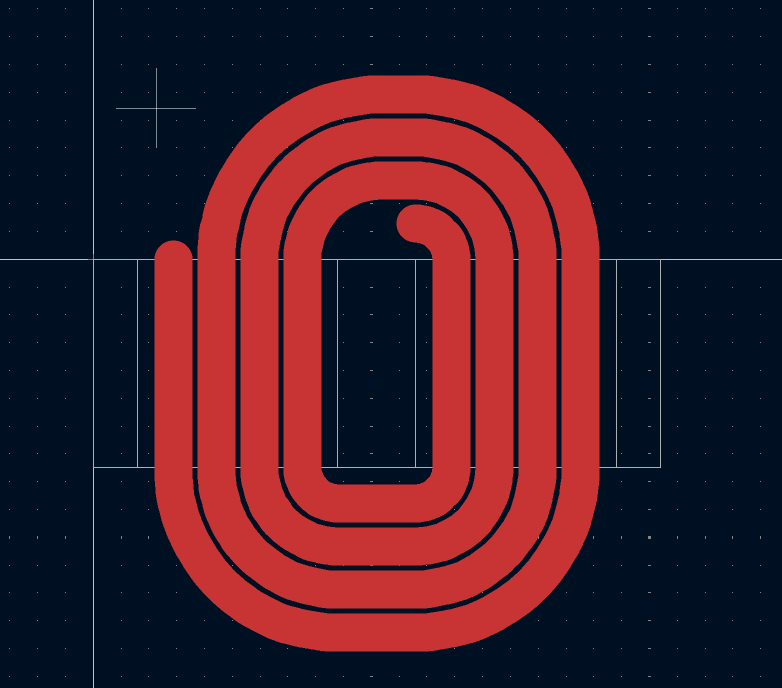

In [34]:
%%render 
xab
eCu
lineW
N
margin
xmab= xa+xab/2
xmcd= xd-xab/2
yadu=0-xab/2
yadd=C+xab/2

<IPython.core.display.Latex object>

In [35]:
txt_pad= """	
	(pad "Nb_" smd roundrect
		(at xs_ ys_ rotation_)
		(size 2.000 1.400)
		(layers "layers_")
		(roundrect_rratio 0.18)
	)
"""

def make_pad2(Num, point,layers,rotation):
    xs, ys= point
    txtin = copy(txt_pad)
    txtin = txtin.replace("xs_",str(xs))
    txtin = txtin.replace("ys_",str(ys))
    txtin = txtin.replace("Nb_",str(Num))
    txtin = txtin.replace("rotation_",str(rotation))
    txtin = txtin.replace("layers_", '" "'.join(layers))
    return txtin

In [36]:
eCu=1

In [37]:
finaltxt = copy(txt )


# make core foot
finaltxt += make_rec(0,0,102,37.5,linewidth=0.2,layer = "F.Fab")
finaltxt += make_line(xa,0,xa,37.5,linewidth=0.2,layer = "F.Fab")
finaltxt += make_line(xb,0,xb,37.5,linewidth=0.2,layer = "F.Fab")
finaltxt += make_line(xc,0,xc,37.5,linewidth=0.2,layer = "F.Fab")
finaltxt += make_line(xd,0,xd,37.5,linewidth=0.2,layer = "F.Fab")




x1=xa+margin+lineW/2
x10=xb #x1+pas*(N-1)
x2=xd-margin-lineW/2
x20= xc# x2-pas*(N-1)
y1= -(margin+lineW/2)-(N-1)*pas
y2= C+ (margin+lineW/2)+(N-1)*pas


arr1 = []
arr2=[]
for i in range(N):
    #print(i,x) 
    point1 = (x1,0)
    point2 = (x1,C)
    
    point22 = (x10,y2) 
    point33 = (x20,y2)

    point4 = (x2,C)
    point5 = (x2,0)

    point77 = (x10+pas,y1) 
    #if i ==N-1:
    #    point77= (x10+pas,y1)
    point66 = (x20,y1)



    p1, p2 = point2 , point22
    pm = arc_mid_90(p1, p2,turn='n')
    finaltxt += make_arc2(p1,pm,p2, linewidth=lineW,layer = "In1.Cu")

    p1, p2 = point33, point4
    pm = arc_mid_90(p1, p2,turn='n')
    finaltxt += make_arc2(p1,pm,p2, linewidth=lineW,layer = "In1.Cu")


    p1, p2 = point5, point66
    pm = arc_mid_90(p1, p2,turn='n')
    finaltxt += make_arc2(p1,pm,p2, linewidth=lineW,layer = "In1.Cu")


    p1, p2 = point77, point1
    arr1.append(p1)
    arr2.append(p2)




    # turn in the direction of positive radian

    finaltxt += make_line2(point1,point2,linewidth=lineW,layer = "In1.Cu")
    #finaltxt += make_line2(point2,point22,linewidth=lineW,layer = "In1.Cu")
    finaltxt += make_line2(point22,point33,linewidth=lineW,layer = "In1.Cu")
    #finaltxt += make_line2(point33,point4,linewidth=lineW,layer = "In1.Cu")
    finaltxt += make_line2(point4,point5,linewidth=lineW,layer = "In1.Cu")
    #finaltxt += make_line2(point5,point66,linewidth=lineW,layer = "In1.Cu")
    if i<N-1:
        #point77= (x10+pas,y1)
        finaltxt += make_line2(point66,point77,linewidth=lineW,layer = "In1.Cu")
    x1=x1+pas
    x2=x2-pas
    y1= y1+pas
    y2= y2-pas
    print(x1,y1, x2,y2)


for i in range(len(arr1)-1):
    p1=  arr1[i]   
    p2=  arr2[i+1] 
    pm = arc_mid_90(p1, p2,turn='n')
    finaltxt += make_arc2(p1,pm,p2, linewidth=lineW,layer = "In1.Cu")




#### prim make pad 
x1=xa+margin+lineW/2
point1 = (x1,0)
point11 = (x1,-(N+2)*pas)
finaltxt += make_line2(point1,point11,linewidth=lineW,layer = "In1.Cu")


point11 = (list(point66)[0],-(N+2)*pas)

finaltxt += make_line2(point66,point11,linewidth=lineW,layer = "In2.Cu")







#point5, point66




######## Seconday B 

lineWs = lineW*N + eCu*(N-1)

point1= (xmcd, C)
point2= (xmcd, 0)
finaltxt += make_line2(point1,point2,linewidth=lineWs,layer = "B.Cu")

point3= (xc, yadu)
point4= (xb, yadu)
finaltxt += make_line2(point3,point4,linewidth=lineWs,layer = "B.Cu")

point5= (xmab, 0)
point6= (xmab, C)
finaltxt += make_line2(point5,point6,linewidth=lineWs,layer = "B.Cu")

point7= (xb, yadd)
point8= ((xc+xb)/2, yadd)
#finaltxt += make_line2(point7,point8,linewidth=lineWs,layer = "B.Cu")


p1, p2 = point2, point3
pm = arc_mid_90(p1, p2,turn='n')
finaltxt += make_arc2(p1,pm,p2, linewidth=lineWs,layer = "B.Cu")


p1, p2 = point4, point5
pm = arc_mid_90(p1, p2,turn='n')
finaltxt += make_arc2(p1,pm,p2, linewidth=lineWs,layer = "B.Cu")

p1, p2 = point6, point7
pm = arc_mid_90(p1, p2,turn='n')
finaltxt += make_arc2(p1,pm,p2, linewidth=lineWs,layer = "B.Cu")

deltaX= E/2
point82= ((xc+xb)/2-deltaX, yadd)
point10 =((xc+xb)/2-deltaX, 2*yadd)
finaltxt += make_line2(point10,point82,linewidth=lineWs,layer = "B.Cu")



######## Seconday F 

lineWs = lineW*N + eCu*(N-1)

point1= (xmcd, C)
point2= (xmcd, 0)
finaltxt += make_line2(point1,point2,linewidth=lineWs,layer = "B.Cu")

point3= (xc, yadu)
point4= (xb, yadu)
finaltxt += make_line2(point3,point4,linewidth=lineWs,layer = "B.Cu")

point5= (xmab, 0)
point6= (xmab, C)
finaltxt += make_line2(point5,point6,linewidth=lineWs,layer = "B.Cu")

point7= (xb, yadd)
point8= ((xc+xb)/2, yadd)
#finaltxt += make_line2(point7,point8,linewidth=lineWs,layer = "B.Cu")


p1, p2 = point2, point3
pm = arc_mid_90(p1, p2,turn='n')
finaltxt += make_arc2(p1,pm,p2, linewidth=lineWs,layer = "B.Cu")


p1, p2 = point4, point5
pm = arc_mid_90(p1, p2,turn='n')
finaltxt += make_arc2(p1,pm,p2, linewidth=lineWs,layer = "B.Cu")

p1, p2 = point6, point7
pm = arc_mid_90(p1, p2,turn='n')
finaltxt += make_arc2(p1,pm,p2, linewidth=lineWs,layer = "B.Cu")


lineWs = lineW*N + eCu*(N-1)

point1= (xmcd, C)
point2= (xmcd, 0)
finaltxt += make_line2(point1,point2,linewidth=lineWs,layer = "F.Cu")

point3= (xc, yadu)
point4= (xb, yadu)
finaltxt += make_line2(point3,point4,linewidth=lineWs,layer = "F.Cu")

point5= (xmab, 0)
point6= (xmab, C)
finaltxt += make_line2(point5,point6,linewidth=lineWs,layer = "F.Cu")

point7= (xb, yadd)
point8= ((xc+xb)/2, yadd)
point9= (xc, yadd)
#finaltxt += make_line2(point7,point8,linewidth=lineWs,layer = "F.Cu")


p1, p2 = point2, point3
pm = arc_mid_90(p1, p2,turn='n')
finaltxt += make_arc2(p1,pm,p2, linewidth=lineWs,layer = "F.Cu")


p1, p2 = point4, point5
pm = arc_mid_90(p1, p2,turn='n')
finaltxt += make_arc2(p1,pm,p2, linewidth=lineWs,layer = "F.Cu")

p1, p2 = point9, point1
pm = arc_mid_90(p1, p2,turn='n')
finaltxt += make_arc2(p1,pm,p2, linewidth=lineWs,layer = "F.Cu")

deltaX= E/2
point82= ((xc+xb)/2+deltaX, yadd)
point10 =((xc+xb)/2+deltaX, 2*yadd)
finaltxt += make_line2(point10,point82,linewidth=lineWs,layer = "F.Cu")


point11 =((xc+xb)/2, 2*yadd)


#finaltxt +=make_pad2(Num=1, point=point11, layers=["F.Cu", "B.Cu"],rotation= 0)



finaltxt +="\n)"
#print(finaltxt)
with open("Testfoot123_V2.kicad_mod", "w") as f: 
    f.write(finaltxt )

22.1875 -21.8125 79.8125 59.3125
29.8125 -14.1875 72.1875 51.6875
37.4375 -6.5625 64.5625 44.0625
45.0625 1.0625 56.9375 36.4375


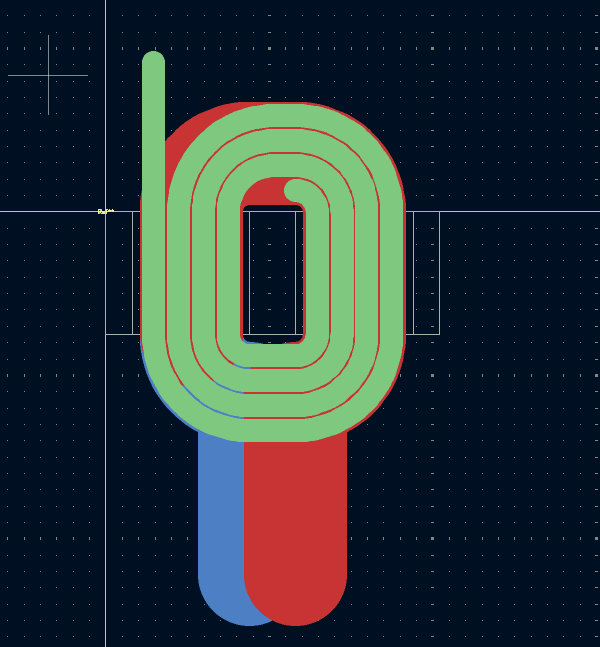

# ELP_102_20_38_V2

In [38]:
eCu=1

In [39]:

%%render 
A = 102
B =86
C=37.5
E=14
xa=(A-B)/2
xb=A/2-E/2
xc=A/2+E/2
xd= A-xa
xab= abs(xa-xb)
xdc=xab
xcb=E

<IPython.core.display.Latex object>

In [40]:
%%render 
margin = 3
eCu=0.5
N=4
dx = (xb-margin)-(xa+margin)
lineW= (dx-(N-1)*eCu)/N
x=xa+margin+lineW/2

<IPython.core.display.Latex object>

In [41]:
txt = """
(footprint "PlanarTransformer_ELP-102-20-38_4T:1T"
	(version 20241229)
	(generator "pcbnew")
	(generator_version "9.0")
	(layer "F.Cu")


	(fp_text user "${REFERENCE}"
		(at 0 2.5 0)
		(unlocked yes)
		(layer "F.Fab")
		(effects
			(font
				(size 1 1)
				(thickness 0.15)
			)
		)
	)
    
"""

In [42]:
finaltxt = copy(txt )


# make core foot
_="""
finaltxt += make_rec(0,0,102,37.5,linewidth=0.2,layer = "F.Fab")
finaltxt += make_line(xa,0,xa,37.5,linewidth=0.2,layer = "F.Fab")
finaltxt += make_line(xb,0,xb,37.5,linewidth=0.2,layer = "F.Fab")
finaltxt += make_line(xc,0,xc,37.5,linewidth=0.2,layer = "F.Fab")
finaltxt += make_line(xd,0,xd,37.5,linewidth=0.2,layer = "F.Fab")
"""

finaltxt += make_rec(0,0,102,37.5,linewidth=0.2,layer = "F.Fab")
finaltxt += make_line(xa,0,xa,37.5,linewidth=0.2,layer = "F.Fab")
finaltxt += make_line(xb,0,xb,37.5,linewidth=0.2,layer = "F.Fab")
finaltxt += make_line(xc,0,xc,37.5,linewidth=0.2,layer = "F.Fab")
finaltxt += make_line(xd,0,xd,37.5,linewidth=0.2,layer = "F.Fab")


x1=xa+margin+lineW/2
x10=xb #x1+pas*(N-1)
x2=xd-margin-lineW/2
x20= xc# x2-pas*(N-1)
y1= -(margin+lineW/2)-(N-1)*pas
y2= C+ (margin+lineW/2)+(N-1)*pas


arr1 = []
arr2=[]

finaltxt +=make_pad2(Num=2, point=(x1,0), layers=["In1.Cu"],rotation= 0)
for i in range(N):
    #print(i,x) 
    point1 = (x1,0)
    point2 = (x1,C)
    
    point22 = (x10,y2) 
    point33 = (x20,y2)

    point4 = (x2,C)
    point5 = (x2,0)

    point77 = (x10+pas,y1) 
    #if i ==N-1:
    #    point77= (x10+pas,y1)
    point66 = (x20,y1)



    p1, p2 = point2 , point22
    pm = arc_mid_90(p1, p2,turn='n')
    finaltxt += make_arc2(p1,pm,p2, linewidth=lineW,layer = "In1.Cu")

    p1, p2 = point33, point4
    pm = arc_mid_90(p1, p2,turn='n')
    finaltxt += make_arc2(p1,pm,p2, linewidth=lineW,layer = "In1.Cu")


    p1, p2 = point5, point66
    pm = arc_mid_90(p1, p2,turn='n')
    finaltxt += make_arc2(p1,pm,p2, linewidth=lineW,layer = "In1.Cu")


    p1, p2 = point77, point1
    arr1.append(p1)
    arr2.append(p2)




    # turn in the direction of positive radian

    finaltxt += make_line2(point1,point2,linewidth=lineW,layer = "In1.Cu")
    #finaltxt += make_line2(point2,point22,linewidth=lineW,layer = "In1.Cu")
    finaltxt += make_line2(point22,point33,linewidth=lineW,layer = "In1.Cu")
    #finaltxt += make_line2(point33,point4,linewidth=lineW,layer = "In1.Cu")
    finaltxt += make_line2(point4,point5,linewidth=lineW,layer = "In1.Cu")
    #finaltxt += make_line2(point5,point66,linewidth=lineW,layer = "In1.Cu")
    if i<N-1:
        #point77= (x10+pas,y1)
        finaltxt += make_line2(point66,point77,linewidth=lineW,layer = "In1.Cu")
    x1=x1+pas
    x2=x2-pas
    y1= y1+pas
    y2= y2-pas
    print(x1,y1, x2,y2)


finaltxt +=make_pad2(Num=1, point=point66, layers=["In1.Cu"],rotation= 0)


for i in range(len(arr1)-1):
    p1=  arr1[i]   
    p2=  arr2[i+1] 
    pm = arc_mid_90(p1, p2,turn='n')
    finaltxt += make_arc2(p1,pm,p2, linewidth=lineW,layer = "In1.Cu")
print(p2)




#### prim make pad 
x1=xa+margin+lineW/2
point1 = (x1,0)
point11 = (x1,-(N+2)*pas)
#finaltxt += make_line2(point1,point11,linewidth=lineW,layer = "In1.Cu")


point11 = (list(point66)[0],-(N+2)*pas)

#finaltxt += make_line2(point66,point11,linewidth=lineW,layer = "In2.Cu")







#point5, point66




######## Seconday B 

lineWs = lineW*N + eCu*(N-1)

point1= (xmcd, C)
point2= (xmcd, 0)
finaltxt += make_line2(point1,point2,linewidth=lineWs,layer = "B.Cu")

point3= (xc, yadu)
point4= (xb, yadu)
finaltxt += make_line2(point3,point4,linewidth=lineWs,layer = "B.Cu")

point5= (xmab, 0)
point6= (xmab, C)
finaltxt += make_line2(point5,point6,linewidth=lineWs,layer = "B.Cu")

point7= (xb, yadd)
point8= ((xc+xb)/2, yadd)
#finaltxt += make_line2(point7,point8,linewidth=lineWs,layer = "B.Cu")


p1, p2 = point2, point3
pm = arc_mid_90(p1, p2,turn='n')
finaltxt += make_arc2(p1,pm,p2, linewidth=lineWs,layer = "B.Cu")


p1, p2 = point4, point5
pm = arc_mid_90(p1, p2,turn='n')
finaltxt += make_arc2(p1,pm,p2, linewidth=lineWs,layer = "B.Cu")

p1, p2 = point6, point7
pm = arc_mid_90(p1, p2,turn='n')
finaltxt += make_arc2(p1,pm,p2, linewidth=lineWs,layer = "B.Cu")

deltaX= E/2
point82= ((xc+xb)/2-deltaX, yadd)
point10 =((xc+xb)/2-deltaX, 2*yadd)
#finaltxt += make_line2(point10,point82,linewidth=lineWs,layer = "B.Cu")
#finaltxt +=make_pad2(Num=3, point=point82, layers=["F.Cu", "B.Cu"],rotation= 0)
print(point8)

######## Seconday F 

lineWs = lineW*N + eCu*(N-1)

point1= (xmcd, C)
point2= (xmcd, 0)
finaltxt += make_line2(point1,point2,linewidth=lineWs,layer = "B.Cu")

point3= (xc, yadu)
point4= (xb, yadu)
finaltxt += make_line2(point3,point4,linewidth=lineWs,layer = "B.Cu")

point5= (xmab, 0)
point6= (xmab, C)
finaltxt += make_line2(point5,point6,linewidth=lineWs,layer = "B.Cu")

point7= (xb, yadd)
point8= ((xc+xb)/2, yadd)
#finaltxt += make_line2(point7,point8,linewidth=lineWs,layer = "B.Cu")


p1, p2 = point2, point3
pm = arc_mid_90(p1, p2,turn='n')
finaltxt += make_arc2(p1,pm,p2, linewidth=lineWs,layer = "B.Cu")


p1, p2 = point4, point5
pm = arc_mid_90(p1, p2,turn='n')
finaltxt += make_arc2(p1,pm,p2, linewidth=lineWs,layer = "B.Cu")

p1, p2 = point6, point7
pm = arc_mid_90(p1, p2,turn='n')
finaltxt += make_arc2(p1,pm,p2, linewidth=lineWs,layer = "B.Cu")


lineWs = lineW*N + eCu*(N-1)

point1= (xmcd, C)
point2= (xmcd, 0)
finaltxt += make_line2(point1,point2,linewidth=lineWs,layer = "F.Cu")

point3= (xc, yadu)
point4= (xb, yadu)
finaltxt += make_line2(point3,point4,linewidth=lineWs,layer = "F.Cu")

point5= (xmab, 0)
point6= (xmab, C)
finaltxt += make_line2(point5,point6,linewidth=lineWs,layer = "F.Cu")

point7= (xb, yadd)
point8= ((xc+xb)/2, yadd)
point9= (xc, yadd)
#finaltxt += make_line2(point7,point8,linewidth=lineWs,layer = "F.Cu")


p1, p2 = point2, point3
pm = arc_mid_90(p1, p2,turn='n')
finaltxt += make_arc2(p1,pm,p2, linewidth=lineWs,layer = "F.Cu")


p1, p2 = point4, point5
pm = arc_mid_90(p1, p2,turn='n')
finaltxt += make_arc2(p1,pm,p2, linewidth=lineWs,layer = "F.Cu")

p1, p2 = point9, point1
pm = arc_mid_90(p1, p2,turn='n')
finaltxt += make_arc2(p1,pm,p2, linewidth=lineWs,layer = "F.Cu")

deltaX= E/2
point82= ((xc+xb)/2+deltaX, yadd)
point10 =((xc+xb)/2+deltaX, 2*yadd)
#finaltxt += make_line2(point10,point82,linewidth=lineWs,layer = "F.Cu")


point11 =((xc+xb)/2, 2*yadd)


finaltxt +=make_pad2(Num=4, point=point82, layers=["F.Cu", "B.Cu"],rotation= 0)



point_ = ((xa+xb)/2, C)
finaltxt +=make_pad2(Num=3, point=point_, layers=["F.Cu"],rotation= 0)

point_ = ((xc+xd)/2, C)
finaltxt +=make_pad2(Num=5, point=point_, layers=["B.Cu"],rotation= 0)




finaltxt +="\n)"
#print(finaltxt)
with open("ELP_102_20_38.kicad_mod", "w") as f: 
    f.write(finaltxt )

22.1875 -21.8125 79.8125 59.3125
29.8125 -14.1875 72.1875 51.6875
37.4375 -6.5625 64.5625 44.0625
45.0625 1.0625 56.9375 36.4375
(37.4375, 0)
(51.0, 55.5)


In [43]:

txt="""
(kicad_pcb
	(version 20241229)
	(generator "pcbnew")
	(generator_version "9.0")
	(general
		(thickness 1.6)
		(legacy_teardrops no)
	)
	(paper "A4")
	(layers
		(0 "F.Cu" signal)
		(4 "In1.Cu" signal)
		(6 "In2.Cu" signal)
		(2 "B.Cu" signal)
		(9 "F.Adhes" user "F.Adhesive")
		(11 "B.Adhes" user "B.Adhesive")
		(13 "F.Paste" user)
		(15 "B.Paste" user)
		(5 "F.SilkS" user "F.Silkscreen")
		(7 "B.SilkS" user "B.Silkscreen")
		(1 "F.Mask" user)
		(3 "B.Mask" user)
		(17 "Dwgs.User" user "User.Drawings")
		(19 "Cmts.User" user "User.Comments")
		(21 "Eco1.User" user "User.Eco1")
		(23 "Eco2.User" user "User.Eco2")
		(25 "Edge.Cuts" user)
		(27 "Margin" user)
		(31 "F.CrtYd" user "F.Courtyard")
		(29 "B.CrtYd" user "B.Courtyard")
		(35 "F.Fab" user)
		(33 "B.Fab" user)
		(39 "User.1" user)
		(41 "User.2" user)
		(43 "User.3" user)
		(45 "User.4" user)
	)
	(setup
		(stackup
			(layer "F.SilkS"
				(type "Top Silk Screen")
			)
			(layer "F.Paste"
				(type "Top Solder Paste")
			)
			(layer "F.Mask"
				(type "Top Solder Mask")
				(thickness 0.01)
			)
			(layer "F.Cu"
				(type "copper")
				(thickness 0.035)
			)
			(layer "dielectric 1"
				(type "prepreg")
				(thickness 0.1)
				(material "FR4")
				(epsilon_r 4.5)
				(loss_tangent 0.02)
			)
			(layer "In1.Cu"
				(type "copper")
				(thickness 0.035)
			)
			(layer "dielectric 2"
				(type "core")
				(thickness 1.24)
				(material "FR4")
				(epsilon_r 4.5)
				(loss_tangent 0.02)
			)
			(layer "In2.Cu"
				(type "copper")
				(thickness 0.035)
			)
			(layer "dielectric 3"
				(type "prepreg")
				(thickness 0.1)
				(material "FR4")
				(epsilon_r 4.5)
				(loss_tangent 0.02)
			)
			(layer "B.Cu"
				(type "copper")
				(thickness 0.035)
			)
			(layer "B.Mask"
				(type "Bottom Solder Mask")
				(thickness 0.01)
			)
			(layer "B.Paste"
				(type "Bottom Solder Paste")
			)
			(layer "B.SilkS"
				(type "Bottom Silk Screen")
			)
			(copper_finish "None")
			(dielectric_constraints no)
		)
        )





"""

In [44]:


txt_rec="""
	(gr_rect
		(start xs_ ys_)
		(end   xe_ ye_)
		(stroke (width linewidth_) (type solid))
		(fill no)
		(layer "layerval_")
	)
"""

txt_arc="""
	(gr_arc
		(start xs_ ys_)
		(mid xm_ ym_)
		(end xe_ ye_)
		(stroke
			(width linewidth_)
			(type solid)
		)
		(layer "layerval_")
	)
"""

txt_line = """
	(gr_line
		(start xs_ ys_)
		(end xe_ ye_)
		(stroke
			(width linewidth_)
			(type default)
		)
		(layer layerval_)
	)
"""

In [45]:
txt_via ="""
	(via
		(at xs_ ys_)
		(size size_)
		(drill drill_)
		(layers "F.Cu" "B.Cu")

	)
"""
# size Total diameter of the via pad (copper ring + hole)
# drill Diameter of the hole drilled in the PCB (before plating) 

In [46]:
finaltxt = copy(txt )


# make core foot


_="""
finaltxt += make_rec(0,0,102,37.5,linewidth=0.2,layer = "F.Fab")
finaltxt += make_line(xa,0,xa,37.5,linewidth=0.2,layer = "F.Fab")
finaltxt += make_line(xb,0,xb,37.5,linewidth=0.2,layer = "F.Fab")
finaltxt += make_line(xc,0,xc,37.5,linewidth=0.2,layer = "F.Fab")
finaltxt += make_line(xd,0,xd,37.5,linewidth=0.2,layer = "F.Fab")
"""



# make core foot
finaltxt += make_rec(0,0,A,C,linewidth=0.2,layer = "F.Fab")
finaltxt += make_line(xa,0,xa,C,linewidth=0.2,layer = "F.Fab")
finaltxt += make_line(xb,0,xb,C,linewidth=0.2,layer = "F.Fab")
finaltxt += make_line(xc,0,xc,C,linewidth=0.2,layer = "F.Fab")
finaltxt += make_line(xd,0,xd,C,linewidth=0.2,layer = "F.Fab")




x1=xa+margin+lineW/2
x10=xb #x1+pas*(N-1)
x2=xd-margin-lineW/2
x20= xc# x2-pas*(N-1)
y1= -(margin+lineW/2)-(N-1)*pas
y2= C+ (margin+lineW/2)+(N-1)*pas


arr1 = []
arr2=[]

#finaltxt +=make_pad2(Num=2, point=(x1,0), layers=["In1.Cu"],rotation= 0)
for i in range(N):
    #print(i,x) 
    point1 = (x1,0)
    point2 = (x1,C)
    
    point22 = (x10,y2) 
    point33 = (x20,y2)

    point4 = (x2,C)
    point5 = (x2,0)

    point77 = (x10+pas,y1) 
    #if i ==N-1:
    #    point77= (x10+pas,y1)
    point66 = (x20,y1)



    p1, p2 = point2 , point22
    pm = arc_mid_90(p1, p2,turn='n')
    finaltxt += make_arc2(p1,pm,p2, linewidth=lineW,layer = "In1.Cu")

    p1, p2 = point33, point4
    pm = arc_mid_90(p1, p2,turn='n')
    finaltxt += make_arc2(p1,pm,p2, linewidth=lineW,layer = "In1.Cu")


    p1, p2 = point5, point66
    pm = arc_mid_90(p1, p2,turn='n')
    finaltxt += make_arc2(p1,pm,p2, linewidth=lineW,layer = "In1.Cu")


    p1, p2 = point77, point1
    arr1.append(p1)
    arr2.append(p2)




    # turn in the direction of positive radian

    finaltxt += make_line2(point1,point2,linewidth=lineW,layer = "In1.Cu")
    #finaltxt += make_line2(point2,point22,linewidth=lineW,layer = "In1.Cu")
    finaltxt += make_line2(point22,point33,linewidth=lineW,layer = "In1.Cu")
    #finaltxt += make_line2(point33,point4,linewidth=lineW,layer = "In1.Cu")
    finaltxt += make_line2(point4,point5,linewidth=lineW,layer = "In1.Cu")
    #finaltxt += make_line2(point5,point66,linewidth=lineW,layer = "In1.Cu")
    if i<N-1:
        #point77= (x10+pas,y1)
        finaltxt += make_line2(point66,point77,linewidth=lineW,layer = "In1.Cu")
    x1=x1+pas
    x2=x2-pas
    y1= y1+pas
    y2= y2-pas
    print(x1,y1, x2,y2)


#finaltxt +=make_pad2(Num=1, point=point66, layers=["In1.Cu"],rotation= 0)


for i in range(len(arr1)-1):
    p1=  arr1[i]   
    p2=  arr2[i+1] 
    pm = arc_mid_90(p1, p2,turn='n')
    finaltxt += make_arc2(p1,pm,p2, linewidth=lineW,layer = "In1.Cu")
print(p2)




#### prim make pad 
x1=xa+margin+lineW/2
point1 = (x1,0)
point11 = (x1,-(N+2)*pas)
#finaltxt += make_line2(point1,point11,linewidth=lineW,layer = "In1.Cu")


point11 = (list(point66)[0],-(N+2)*pas)

finaltxt += make_line2(point66,point11,linewidth=lineW,layer = "In2.Cu")







#point5, point66




######## Seconday B 

lineWs = lineW*N + eCu*(N-1)

point1= (xmcd, C)
point2= (xmcd, 0)
finaltxt += make_line2(point1,point2,linewidth=lineWs,layer = "B.Cu")

point3= (xc, yadu)
point4= (xb, yadu)
finaltxt += make_line2(point3,point4,linewidth=lineWs,layer = "B.Cu")

point5= (xmab, 0)
point6= (xmab, C)
finaltxt += make_line2(point5,point6,linewidth=lineWs,layer = "B.Cu")

point7= (xb, yadd)
point8= ((xc+xb)/2, yadd)
#finaltxt += make_line2(point7,point8,linewidth=lineWs,layer = "B.Cu")


p1, p2 = point2, point3
pm = arc_mid_90(p1, p2,turn='n')
finaltxt += make_arc2(p1,pm,p2, linewidth=lineWs,layer = "B.Cu")


p1, p2 = point4, point5
pm = arc_mid_90(p1, p2,turn='n')
finaltxt += make_arc2(p1,pm,p2, linewidth=lineWs,layer = "B.Cu")

p1, p2 = point6, point7
pm = arc_mid_90(p1, p2,turn='n')
finaltxt += make_arc2(p1,pm,p2, linewidth=lineWs,layer = "B.Cu")

deltaX= E/2
point82= ((xc+xb)/2-deltaX, yadd)
point10 =((xc+xb)/2-deltaX, 2*yadd)
#finaltxt += make_line2(point10,point82,linewidth=lineWs,layer = "B.Cu")
#finaltxt +=make_pad2(Num=3, point=point82, layers=["F.Cu", "B.Cu"],rotation= 0)
print(point8)

######## Seconday F 

lineWs = lineW*N + eCu*(N-1)

point1= (xmcd, C)
point2= (xmcd, 0)
finaltxt += make_line2(point1,point2,linewidth=lineWs,layer = "B.Cu")

point3= (xc, yadu)
point4= (xb, yadu)
finaltxt += make_line2(point3,point4,linewidth=lineWs,layer = "B.Cu")

point5= (xmab, 0)
point6= (xmab, C)
finaltxt += make_line2(point5,point6,linewidth=lineWs,layer = "B.Cu")

point7= (xb, yadd)
point8= ((xc+xb)/2, yadd)
#finaltxt += make_line2(point7,point8,linewidth=lineWs,layer = "B.Cu")


p1, p2 = point2, point3
pm = arc_mid_90(p1, p2,turn='n')
finaltxt += make_arc2(p1,pm,p2, linewidth=lineWs,layer = "B.Cu")


p1, p2 = point4, point5
pm = arc_mid_90(p1, p2,turn='n')
finaltxt += make_arc2(p1,pm,p2, linewidth=lineWs,layer = "B.Cu")

p1, p2 = point6, point7
pm = arc_mid_90(p1, p2,turn='n')
finaltxt += make_arc2(p1,pm,p2, linewidth=lineWs,layer = "B.Cu")


lineWs = lineW*N + eCu*(N-1)

point1= (xmcd, C)
point2= (xmcd, 0)
finaltxt += make_line2(point1,point2,linewidth=lineWs,layer = "F.Cu")

point3= (xc, yadu)
point4= (xb, yadu)
finaltxt += make_line2(point3,point4,linewidth=lineWs,layer = "F.Cu")

point5= (xmab, 0)
point6= (xmab, C)
finaltxt += make_line2(point5,point6,linewidth=lineWs,layer = "F.Cu")

point7= (xb, yadd)
point8= ((xc+xb)/2, yadd)
point9= (xc, yadd)
#finaltxt += make_line2(point7,point8,linewidth=lineWs,layer = "F.Cu")


p1, p2 = point2, point3
pm = arc_mid_90(p1, p2,turn='n')
finaltxt += make_arc2(p1,pm,p2, linewidth=lineWs,layer = "F.Cu")


p1, p2 = point4, point5
pm = arc_mid_90(p1, p2,turn='n')
finaltxt += make_arc2(p1,pm,p2, linewidth=lineWs,layer = "F.Cu")

p1, p2 = point9, point1
pm = arc_mid_90(p1, p2,turn='n')
finaltxt += make_arc2(p1,pm,p2, linewidth=lineWs,layer = "F.Cu")

deltaX= E/2
point82= ((xc+xb)/2+deltaX, yadd)
point10 =((xc+xb)/2+deltaX, 2*yadd)
#finaltxt += make_line2(point10,point82,linewidth=lineWs,layer = "F.Cu")


point11 =((xc+xb)/2, 2*yadd)


#finaltxt +=make_pad2(Num=4, point=point82, layers=["F.Cu", "B.Cu"],rotation= 0)



point_ = ((xa+xb)/2, C)
#finaltxt +=make_pad2(Num=3, point=point_, layers=["F.Cu"],rotation= 0)

point_ = ((xc+xd)/2, C)
#finaltxt +=make_pad2(Num=5, point=point_, layers=["B.Cu"],rotation= 0)




finaltxt +="\n)"
#print(finaltxt)
with open("../testPCB.kicad_pcb", "w") as f: 
    f.write(finaltxt )

22.1875 -21.8125 79.8125 59.3125
29.8125 -14.1875 72.1875 51.6875
37.4375 -6.5625 64.5625 44.0625
45.0625 1.0625 56.9375 36.4375
(37.4375, 0)
(51.0, 55.5)


# elp 43/10/28 

In [74]:

%%render 
A = 43.2
B =35.4
C=27.9
E=8.1
margin = 3

N=2
eCu=0.5

<IPython.core.display.Latex object>

In [75]:

%%render 

xa=(A-B)/2
xb=A/2-E/2
xc=A/2+E/2
xd= A-xa
xab= abs(xa-xb)
xdc=xab
xcb=E
pas=lineW+eCu

<IPython.core.display.Latex object>

In [76]:
lineW+eCu

4.074999999999999

In [77]:
4.075-7.625

-3.55

In [78]:
%%render 


dx = (xb-margin)-(xa+margin)
lineW= (dx-(N-1)*eCu)/N
x=xa+margin+lineW/2

<IPython.core.display.Latex object>

In [79]:
A,B,C,E,eCu

(43.2, 35.4, 27.9, 8.1, 0.5)

In [80]:

txt="""
(kicad_pcb
	(version 20241229)
	(generator "pcbnew")
	(generator_version "9.0")
	(general
		(thickness 1.6)
		(legacy_teardrops no)
	)
	(paper "A4")
	(layers
		(0 "F.Cu" signal)
		(4 "In1.Cu" signal)
		(6 "In2.Cu" signal)
		(2 "B.Cu" signal)
		(9 "F.Adhes" user "F.Adhesive")
		(11 "B.Adhes" user "B.Adhesive")
		(13 "F.Paste" user)
		(15 "B.Paste" user)
		(5 "F.SilkS" user "F.Silkscreen")
		(7 "B.SilkS" user "B.Silkscreen")
		(1 "F.Mask" user)
		(3 "B.Mask" user)
		(17 "Dwgs.User" user "User.Drawings")
		(19 "Cmts.User" user "User.Comments")
		(21 "Eco1.User" user "User.Eco1")
		(23 "Eco2.User" user "User.Eco2")
		(25 "Edge.Cuts" user)
		(27 "Margin" user)
		(31 "F.CrtYd" user "F.Courtyard")
		(29 "B.CrtYd" user "B.Courtyard")
		(35 "F.Fab" user)
		(33 "B.Fab" user)
		(39 "User.1" user)
		(41 "User.2" user)
		(43 "User.3" user)
		(45 "User.4" user)
	)
	(setup
		(stackup
			(layer "F.SilkS"
				(type "Top Silk Screen")
			)
			(layer "F.Paste"
				(type "Top Solder Paste")
			)
			(layer "F.Mask"
				(type "Top Solder Mask")
				(thickness 0.01)
			)
			(layer "F.Cu"
				(type "copper")
				(thickness 0.035)
			)
			(layer "dielectric 1"
				(type "prepreg")
				(thickness 0.1)
				(material "FR4")
				(epsilon_r 4.5)
				(loss_tangent 0.02)
			)
			(layer "In1.Cu"
				(type "copper")
				(thickness 0.035)
			)
			(layer "dielectric 2"
				(type "core")
				(thickness 1.24)
				(material "FR4")
				(epsilon_r 4.5)
				(loss_tangent 0.02)
			)
			(layer "In2.Cu"
				(type "copper")
				(thickness 0.035)
			)
			(layer "dielectric 3"
				(type "prepreg")
				(thickness 0.1)
				(material "FR4")
				(epsilon_r 4.5)
				(loss_tangent 0.02)
			)
			(layer "B.Cu"
				(type "copper")
				(thickness 0.035)
			)
			(layer "B.Mask"
				(type "Bottom Solder Mask")
				(thickness 0.01)
			)
			(layer "B.Paste"
				(type "Bottom Solder Paste")
			)
			(layer "B.SilkS"
				(type "Bottom Silk Screen")
			)
			(copper_finish "None")
			(dielectric_constraints no)
		)
        )





"""

In [81]:


txt_rec="""
	(gr_rect
		(start xs_ ys_)
		(end   xe_ ye_)
		(stroke (width linewidth_) (type solid))
		(fill no)
		(layer "layerval_")
	)
"""

txt_arc="""
	(gr_arc
		(start xs_ ys_)
		(mid xm_ ym_)
		(end xe_ ye_)
		(stroke
			(width linewidth_)
			(type solid)
		)
		(layer "layerval_")
	)
"""

txt_line = """
	(gr_line
		(start xs_ ys_)
		(end xe_ ye_)
		(stroke
			(width linewidth_)
			(type default)
		)
		(layer layerval_)
	)
"""

In [82]:
txt_via ="""
	(via
		(at xs_ ys_)
		(size size_)
		(drill drill_)
		(layers "F.Cu" "B.Cu")

	)
"""
# size Total diameter of the via pad (copper ring + hole)
# drill Diameter of the hole drilled in the PCB (before plating) 

In [83]:
finaltxt = copy(txt )


# make core foot
finaltxt += make_rec(0,0,A,C,linewidth=0.2,layer = "F.Fab")
finaltxt += make_line(xa,0,xa,C,linewidth=0.2,layer = "F.Fab")
finaltxt += make_line(xb,0,xb,C,linewidth=0.2,layer = "F.Fab")
finaltxt += make_line(xc,0,xc,C,linewidth=0.2,layer = "F.Fab")
finaltxt += make_line(xd,0,xd,C,linewidth=0.2,layer = "F.Fab")




x1=xa+margin+lineW/2
x10=xb #x1+pas*(N-1)
x2=xd-margin-lineW/2
x20= xc# x2-pas*(N-1)
y1= -(margin+lineW/2)-(N-1)*pas
y2= C+ (margin+lineW/2)+(N-1)*pas


arr1 = []
arr2=[]

#finaltxt +=make_pad2(Num=2, point=(x1,0), layers=["In1.Cu"],rotation= 0)
for i in range(N):
    #print(i,x) 
    point1 = (x1,0)
    point2 = (x1,C)
    
    point22 = (x10,y2) 
    point33 = (x20,y2)

    point4 = (x2,C)
    point5 = (x2,0)

    point77 = (x10+pas,y1) 
    #if i ==N-1:
    #    point77= (x10+pas,y1)
    point66 = (x20,y1)



    p1, p2 = point2 , point22
    pm = arc_mid_90(p1, p2,turn='n')
    finaltxt += make_arc2(p1,pm,p2, linewidth=lineW,layer = "In1.Cu")

    p1, p2 = point33, point4
    pm = arc_mid_90(p1, p2,turn='n')
    finaltxt += make_arc2(p1,pm,p2, linewidth=lineW,layer = "In1.Cu")


    p1, p2 = point5, point66
    pm = arc_mid_90(p1, p2,turn='n')
    finaltxt += make_arc2(p1,pm,p2, linewidth=lineW,layer = "In1.Cu")


    p1, p2 = point77, point1
    arr1.append(p1)
    arr2.append(p2)




    # turn in the direction of positive radian

    finaltxt += make_line2(point1,point2,linewidth=lineW,layer = "In1.Cu")
    #finaltxt += make_line2(point2,point22,linewidth=lineW,layer = "In1.Cu")
    finaltxt += make_line2(point22,point33,linewidth=lineW,layer = "In1.Cu")
    #finaltxt += make_line2(point33,point4,linewidth=lineW,layer = "In1.Cu")
    finaltxt += make_line2(point4,point5,linewidth=lineW,layer = "In1.Cu")
    #finaltxt += make_line2(point5,point66,linewidth=lineW,layer = "In1.Cu")
    if i<N-1:
        #point77= (x10+pas,y1)
        finaltxt += make_line2(point66,point77,linewidth=lineW,layer = "In1.Cu")
    x1=x1+pas
    x2=x2-pas
    y1= y1+pas
    y2= y2-pas
    print(x1,y1, x2,y2)


#finaltxt +=make_pad2(Num=1, point=point66, layers=["In1.Cu"],rotation= 0)


for i in range(len(arr1)-1):
    p1=  arr1[i]   
    p2=  arr2[i+1] 
    pm = arc_mid_90(p1, p2,turn='n')
    finaltxt += make_arc2(p1,pm,p2, linewidth=lineW,layer = "In1.Cu")





#### prim make pad 
x1=xa+margin+lineW/2
point1 = (x1,0)
point11 = (x1,-(N+2)*pas)
#finaltxt += make_line2(point1,point11,linewidth=lineW,layer = "In1.Cu")


point11 = (list(point66)[0],-(N+2)*pas)

finaltxt += make_line2(point66,point11,linewidth=lineW,layer = "In2.Cu")










finaltxt +="\n)"
#print(finaltxt)
with open("../testPCB22.kicad_pcb", "w") as f: 
    f.write(finaltxt )

12.762500000000001 -4.7875 30.437499999999996 32.6875
16.8375 -0.7125000000000004 26.362499999999997 28.6125


In [84]:
pas

4.074999999999999

In [85]:
def draw_spirale(deltax, layer_inp):
    arr1 = []
    arr2=[]

    finaltxt_local= ""
    x1=xa+margin+lineW/2+deltax
    x10=xb +deltax
    x2=xd-margin-lineW/2+deltax
    x20= xc+deltax
    y1= -(margin+lineW/2)-(N-1)*pas
    y2= C+ (margin+lineW/2)+(N-1)*pas
    
    
    arr1 = []
    arr2=[]
    
    #finaltxt_local +=make_pad2(Num=2, point=(x1,0), layers=[layer_inp],rotation= 0)
    for i in range(N):
        #print(i,x) 
        point1 = (x1,0)
        point2 = (x1,C)
        
        point22 = (x10,y2) 
        point33 = (x20,y2)
    
        point4 = (x2,C)
        point5 = (x2,0)
    
        point77 = (x10+pas,y1) 
        #if i ==N-1:
        #    point77= (x10+pas,y1)
        point66 = (x20,y1)
    
    
    
        p1, p2 = point2 , point22
        pm = arc_mid_90(p1, p2,turn='n')
        finaltxt_local += make_arc2(p1,pm,p2, linewidth=lineW,layer = layer_inp)
    
        p1, p2 = point33, point4
        pm = arc_mid_90(p1, p2,turn='n')
        finaltxt_local += make_arc2(p1,pm,p2, linewidth=lineW,layer = layer_inp)
    
    
        p1, p2 = point5, point66
        pm = arc_mid_90(p1, p2,turn='n')
        finaltxt_local += make_arc2(p1,pm,p2, linewidth=lineW,layer = layer_inp)
    
    
        p1, p2 = point77, point1
        arr1.append(p1)
        arr2.append(p2)
    
    
    
    
        # turn in the direction of positive radian
    
        finaltxt_local += make_line2(point1,point2,linewidth=lineW,layer = layer_inp)
        #finaltxt_local += make_line2(point2,point22,linewidth=lineW,layer = layer_inp)
        finaltxt_local += make_line2(point22,point33,linewidth=lineW,layer = layer_inp)
        #finaltxt_local += make_line2(point33,point4,linewidth=lineW,layer = layer_inp)
        finaltxt_local += make_line2(point4,point5,linewidth=lineW,layer = layer_inp)
        #finaltxt_local += make_line2(point5,point66,linewidth=lineW,layer = layer_inp)
        if i<N-1:
            #point77= (x10+pas,y1)
            finaltxt_local += make_line2(point66,point77,linewidth=lineW,layer = layer_inp)
        x1=x1+pas
        x2=x2-pas
        y1= y1+pas
        y2= y2-pas

    
    
    #finaltxt_local +=make_pad2(Num=1, point=point66, layers=[layer_inp],rotation= 0)
    
    
    for i in range(len(arr1)-1):
        p1=  arr1[i]   
        p2=  arr2[i+1] 
        pm = arc_mid_90(p1, p2,turn='n')
        finaltxt_local += make_arc2(p1,pm,p2, linewidth=lineW,layer = layer_inp)
    return finaltxt_local

In [86]:
finaltxt = copy(txt )


# make core foot
finaltxt += make_rec(0,0,A,C,linewidth=0.2,layer = "F.Fab")
finaltxt += make_line(xa,0,xa,C,linewidth=0.2,layer = "F.Fab")
finaltxt += make_line(xb,0,xb,C,linewidth=0.2,layer = "F.Fab")
finaltxt += make_line(xc,0,xc,C,linewidth=0.2,layer = "F.Fab")
finaltxt += make_line(xd,0,xd,C,linewidth=0.2,layer = "F.Fab")













aa= 0 
layerss =["F.Cu", "In1.Cu", "In2.Cu", "B.Cu"]
for i in range(4): 
    layer = layerss[i]

    finaltxt +=draw_spirale(deltax=aa, layer_inp=layer)
    aa= aa+1.5*A
    print(aa , layer)








finaltxt +="\n)"
#print(finaltxt)
with open("../testPCB4.kicad_pcb", "w") as f: 
    f.write(finaltxt )

64.80000000000001 F.Cu
129.60000000000002 In1.Cu
194.40000000000003 In2.Cu
259.20000000000005 B.Cu


In [ ]:
STOPPPPPPPPPPPPP

### Groupe 

In [58]:
print("0c015781-605f-46bf-9685-8e37365860bf")
import uuid

s = str(uuid.uuid4())
print(s)


0c015781-605f-46bf-9685-8e37365860bf
3305b07b-b6ca-4ba1-8769-260d92177878


In [59]:
txt = """
(footprint "PlanarTransformer_ELP-102-20-38_4T:1T"
	(version 20241229)
	(generator "pcbnew")
	(generator_version "9.0")
	(layer "F.Cu")
    (uuid "uuid_")
    
"""

txt_rec="""
	(gr_rect
		(start xs_ ys_)
		(end   xe_ ye_)
		(stroke (width linewidth_) (type solid))
		(fill no)
		(layer "layerval_")
        (uuid "uuid_")
	)
"""

txt_arc="""
	(gr_arc
		(start xs_ ys_)
		(mid xm_ ym_)
		(end xe_ ye_)
		(stroke
			(width linewidth_)
			(type solid)
		)
		(layer "layerval_")
        (uuid "uuid_")
	)
"""

txt_line = """
	(gr_line
		(start xs_ ys_)
		(end xe_ ye_)
		(stroke
			(width linewidth_)
			(type default)
		)
		(layer "layerval_")
        (uuid "uuid_")
	)
"""








    

    
def make_rec3(pointS,pointE,linewidth,layer,uuidinp):
    xs,ys = pointS
    xe,ye = pointE
    
    txtin = copy(txt_rec)
    txtin = txtin.replace("xs_",str(xs))
    txtin = txtin.replace("ys_",str(ys))
    txtin = txtin.replace("xe_",str(xe))
    txtin = txtin.replace("ye_",str(ye))
    txtin = txtin.replace("linewidth_",str(linewidth))
    txtin = txtin.replace("layerval_",str(layer))
    txtin = txtin.replace("uuid_",uuidinp)
    print(uuidinp)
    return txtin

def make_arc3(pointS,pointM,pointE,linewidth,layer,uuidinp):
    xs,ys = pointS
    xe,ye = pointE
    xm,ym = pointM
    
    txtin = copy(txt_arc)
    txtin = txtin.replace("xs_",str(xs))
    txtin = txtin.replace("ys_",str(ys))
    txtin = txtin.replace("xe_",str(xe))
    txtin = txtin.replace("ye_",str(ye))
    txtin = txtin.replace("xm_",str(xm))
    txtin = txtin.replace("ym_",str(ym))
    txtin = txtin.replace("linewidth_",str(linewidth))
    txtin = txtin.replace("layerval_",str(layer))
    txtin = txtin.replace("uuid_",uuidinp)
    print("arc",uuidinp)
    return txtin


def make_line3(pointS,pointE,linewidth,layer,uuidinp):
    xs,ys = pointS
    xe,ye = pointE
    
    txtin = copy(txt_line)
    txtin = txtin.replace("xs_",str(xs))
    txtin = txtin.replace("ys_",str(ys))
    txtin = txtin.replace("xe_",str(xe))
    txtin = txtin.replace("ye_",str(ye))
    txtin = txtin.replace("linewidth_",str(linewidth))
    txtin = txtin.replace("layerval_",str(layer))
    txtin = txtin.replace("uuid_",uuidinp)
    return txtin
    
idu= str(uuid.uuid4())  
print(make_rec3((0,0),(10,20),linewidth=0.2,layer = "F.Fab",uuidinp=idu))
#print(make_arc3(0,1,0.7,0.7,0,1,linewidth=0.23,layer = "F.Cu"))
#print(make_line3(0,0,10,10,linewidth=0.2,layer = "F.Fab"))


0ee218e7-05f0-4a07-ab49-4fac96d5a0a9

	(gr_rect
		(start 0 0)
		(end   10 20)
		(stroke (width 0.2) (type solid))
		(fill no)
		(layer "F.Fab")
        (uuid "0ee218e7-05f0-4a07-ab49-4fac96d5a0a9")
	)



In [60]:
txtgroupe="""
    (group ""
		(uuid "groupID__")
		(members "members__")
	)
"""

In [61]:
def draw_spirale2(deltax, layer_inp):
    arr1 = []
    arr2=[]
    arrid = []

    finaltxt_local= ""
    x1=xa+margin+lineW/2+deltax
    x10=xb +deltax
    x2=xd-margin-lineW/2+deltax
    x20= xc+deltax
    y1= -(margin+lineW/2)-(N-1)*pas
    y2= C+ (margin+lineW/2)+(N-1)*pas
    
    
    arr1 = []
    arr2=[]
    
    #finaltxt_local +=make_pad2(Num=2, point=(x1,0), layers=[layer_inp],rotation= 0)
    for i in range(N):
        #print(i,x) 
        point1 = (x1,0)
        point2 = (x1,C)
        
        point22 = (x10,y2) 
        point33 = (x20,y2)
    
        point4 = (x2,C)
        point5 = (x2,0)
    
        point77 = (x10+pas,y1) 
        #if i ==N-1:
        #    point77= (x10+pas,y1)
        point66 = (x20,y1)
    
    
    
        p1, p2 = point2 , point22
        pm = arc_mid_90(p1, p2,turn='n')
        
        idu= str(uuid.uuid4())
        arrid.append(idu)
        finaltxt_local += make_arc3(p1,pm,p2, linewidth=lineW,layer = layer_inp, uuidinp=idu)
        
    
        p1, p2 = point33, point4
        pm = arc_mid_90(p1, p2,turn='n')
        
        idu= str(uuid.uuid4())
        arrid.append(idu)
        finaltxt_local += make_arc3(p1,pm,p2, linewidth=lineW,layer = layer_inp, uuidinp=idu)
    
    
        p1, p2 = point5, point66
        pm = arc_mid_90(p1, p2,turn='n')

        idu= str(uuid.uuid4())
        arrid.append(idu)
        finaltxt_local += make_arc3(p1,pm,p2, linewidth=lineW,layer = layer_inp, uuidinp=idu)
    
    
        p1, p2 = point77, point1
        arr1.append(p1)
        arr2.append(p2)
    
    
    
    
        # turn in the direction of positive radian
        idu= str(uuid.uuid4())
        arrid.append(idu)
        
        finaltxt_local += make_line3(point1,point2,linewidth=lineW,layer = layer_inp,uuidinp=idu)
        #finaltxt_local += make_line2(point2,point22,linewidth=lineW,layer = layer_inp)
        idu= str(uuid.uuid4())
        arrid.append(idu)
        
        finaltxt_local += make_line3(point22,point33,linewidth=lineW,layer = layer_inp,uuidinp=idu)
        #finaltxt_local += make_line2(point33,point4,linewidth=lineW,layer = layer_inp)

        idu= str(uuid.uuid4())
        arrid.append(idu)
        
        finaltxt_local += make_line3(point4,point5,linewidth=lineW,layer = layer_inp,uuidinp=idu)
        #finaltxt_local += make_line2(point5,point66,linewidth=lineW,layer = layer_inp)
        if i<N-1:
            #point77= (x10+pas,y1)
            idu= str(uuid.uuid4())
            arrid.append(idu)
            finaltxt_local += make_line3(point66,point77,linewidth=lineW,layer = layer_inp, uuidinp=idu)
        x1=x1+pas
        x2=x2-pas
        y1= y1+pas
        y2= y2-pas

    
    
    #finaltxt_local +=make_pad2(Num=1, point=point66, layers=[layer_inp],rotation= 0)
    
    
    for i in range(len(arr1)-1):
        p1=  arr1[i]   
        p2=  arr2[i+1] 
        pm = arc_mid_90(p1, p2,turn='n')
        idu= str(uuid.uuid4())
        arrid.append(idu)
        finaltxt_local += make_arc3(p1,pm,p2, linewidth=lineW,layer = layer_inp, uuidinp=idu)

        
    idu= str(uuid.uuid4())
    finaltxt_local += copy(txtgroupe).replace("groupID__", idu).replace("members__", '" "'.join(arrid))
    
    return finaltxt_local

In [62]:
finaltxt = copy(txt )


# make core foot
finaltxt += make_rec(0,0,A,C,linewidth=0.2,layer = "F.Fab")
finaltxt += make_line(xa,0,xa,C,linewidth=0.2,layer = "F.Fab")
finaltxt += make_line(xb,0,xb,C,linewidth=0.2,layer = "F.Fab")
finaltxt += make_line(xc,0,xc,C,linewidth=0.2,layer = "F.Fab")
finaltxt += make_line(xd,0,xd,C,linewidth=0.2,layer = "F.Fab")













aa= 0 
layerss =["F.Cu", "In1.Cu", "In2.Cu", "B.Cu"]
for i in range(4): 
    layer = layerss[i]

    finaltxt +=draw_spirale2(deltax=aa, layer_inp=layer)
    aa= aa+1.5*A
    print(aa , layer)








finaltxt +="\n)"
#print(finaltxt)
with open("../testPCB5.kicad_pcb", "w") as f: 
    f.write(finaltxt )

arc c6ae94e8-85e2-46d0-81ef-70ac63157563
arc b5a5271d-daa8-4b2e-a79b-20cac3be419b
arc 7e659271-a1a2-4924-80ad-8e402ff93214
arc f4bb5db9-66b7-4230-8370-d370190c2b37
arc fae2952e-e2e2-4972-8c35-21fb79d046c9
arc a860c267-5548-4cd7-b090-3ebf7024547a
arc 77758b3a-692a-4176-b9cb-cbf7be07b67b
64.80000000000001 F.Cu
arc 6b7f2c5a-b61a-484a-babb-2dce8d1c6b70
arc 53bb0335-1280-40c0-85e5-f40722835f00
arc b9d5c2ad-be71-4deb-bc7d-2d5942fcc67d
arc 99f93e01-4c89-435f-8d96-5d16182434db
arc dadf8829-290d-4ae0-ae82-46029c1298f3
arc 2181b233-4e02-4971-b181-d60f3b3c9d20
arc daa3c9ba-f756-4959-bd14-a12aec3c9eab
129.60000000000002 In1.Cu
arc c8b248bc-ec09-44f8-b73f-585973095fb5
arc 74b030ee-5468-4f1b-945b-09dd72fd8628
arc 038fbf28-562b-47f4-b489-3f16da954512
arc 5b012655-5b15-4a2e-ab74-de86d1eb496a
arc 953d55ef-9f52-486d-9419-9a2644b9f364
arc b9044bc8-83ef-4b6f-bf1f-e15600dc7c25
arc 7aa7112e-925e-4967-aeac-12fb10382a90
194.40000000000003 In2.Cu
arc d459a1c1-863e-46a3-bef0-ab3eaa7fcb13
arc 2c9a318a-cebb-4cbf-

In [63]:
print(finaltxt [-1000:])

 3.5749999999999993)
			(type default)
		)
		(layer "B.Cu")
        (uuid "c9b74e17-8df0-447a-b521-dcc5bab096f6")
	)

	(gr_arc
		(start 219.57500000000005 -12.4125)
		(mid 212.57303707852202 -8.041733848265778)
		(end 210.71250000000003 0)
		(stroke
			(width 3.5749999999999993)
			(type solid)
		)
		(layer "B.Cu")
        (uuid "b3e4b636-a77f-4187-ad59-c25b8fba9e2f")
	)

    (group ""
		(uuid "4ecefa5d-8dbf-45f6-b6db-4e54f8b7a8fb")
		(members "d459a1c1-863e-46a3-bef0-ab3eaa7fcb13" "2c9a318a-cebb-4cbf-a801-9ea5bdc48702" "603311cb-909d-4131-aa24-2d4e2b8d0802" "6b5563b0-e3c6-4b4c-b371-3bc5514737fc" "8adc474c-a2c1-480a-bb9d-f7da80c84a60" "8a5b6b80-f53b-490c-8b82-35b0d2d7da39" "2a83e2b8-ba99-4b62-bf03-fec58c7ae12f" "b9f7a050-b805-42fd-a4ea-469cbdd4c6e3" "2a629cb3-e8e4-490b-bdb0-a8462fe4dade" "3148e485-f17a-4e9d-bd93-63a8279ead9a" "f44101ae-b464-4370-8907-30e7d55484e4" "33aa5377-cf0d-44f0-af73-5fee766e3c2b" "c9b74e17-8df0-447a-b521-dcc5bab096f6" "b3e4b636-a77f-4187-ad59-c25b8fba9e2f")
	)

)